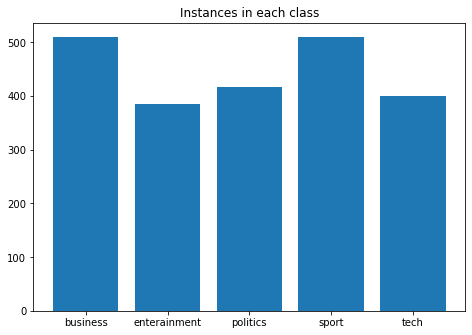

In [3]:
import matplotlib.pyplot as plt

#Plotting a bar graph that shows the amount of documents in each of the 5 classes

figure = plt.figure()
figure.add_axes([0,0,1,1])
classes = ['business', 'enterainment', 'politics', 'sport', 'tech']
instances = [510,386,417,511,401]
plt.bar(classes,instances)
plt.title('Instances in each class')
figure.savefig('BBC-distribution.pdf', bbox_inches = "tight")



In [4]:
from sklearn.datasets import load_files
corpus=load_files(r"C:\Users\Rahimuz\Documents\GitHub\comp-476-a1\BBC", encoding='latin 1' , random_state=None)


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus.data)
print(corpus.target_names)
print(X.shape)
#print(X.toarray())


['business', 'entertainment', 'politics', 'sport', 'tech']
(2225, 29421)


In [6]:
from sklearn.model_selection import train_test_split
print(X.shape)
Xtrain, Xtest, Ytrain, Ytest= train_test_split(X, corpus.target, train_size = 0.8, test_size=0.2)    


(2225, 29421)


In [7]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(Xtrain, Ytrain)

print(clf.predict(Xtrain))
print(Ytrain)
y_predict = clf.predict(Xtest)
#print(y_predict)


[1 4 1 ... 2 4 1]
[1 4 1 ... 2 4 1]


In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
confusion_matrix(Ytest,y_predict)


array([[ 90,   0,   2,   0,   2],
       [  1,  80,   2,   0,   0],
       [  0,   0,  80,   0,   0],
       [  0,   0,   0, 107,   0],
       [  0,   2,   1,   0,  78]], dtype=int64)

In [9]:
print(classification_report(Ytest, y_predict ))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        94
           1       0.98      0.96      0.97        83
           2       0.94      1.00      0.97        80
           3       1.00      1.00      1.00       107
           4       0.97      0.96      0.97        81

    accuracy                           0.98       445
   macro avg       0.98      0.98      0.98       445
weighted avg       0.98      0.98      0.98       445



In [10]:
#e
print("the prior probability of class Business:", round(100*(510/2225)), "% \n")
print("the prior probability of class Entertainment:", round(100*(386/2225)), "% \n")
print("the prior probability of class Politics:", round(100*(417/2225)), "% \n")
print("the prior probability of class Sports:", round(100*(511/2225)), "% \n")
print("the prior probability of class Tech:", round(100*(401/2225)), "% \n")


the prior probability of class Business: 23 % 

the prior probability of class Entertainment: 17 % 

the prior probability of class Politics: 19 % 

the prior probability of class Sports: 23 % 

the prior probability of class Tech: 18 % 



In [11]:
#f
print("size of vocabulary: ",len(vectorizer.get_feature_names()))

size of vocabulary:  29421


In [19]:
#g,h
import os
#change path to your own worspaces directory!
path=r"C:\Users\Rahimuz\Documents\GitHub\comp-476-a1\BBC"
os.chdir(path)

#might crash, needs fix
# def wordtofreq(wordlist):
#     wordfreq=[]
#     for i in wordlist:
#         wordfreq.append(wordlist.count(i))
#     #wordfreq= [wordlist.count(i) for i in wordlist]
#     for j in wordfreq:
#         if(wordfreq[j]==1):
#             print ("word/freq pairs:", str(list(zip(wordlist,wordfreq[j]))))

def read_text_file(file_path):
    with open(file_path, 'r') as f:
        lines= f.read().split()
        s=len(lines)
        #wordtofreq(lines)
        #print("Number of words:",s)
        return s
filepath=""
dirctr=0
for root,directories,files in os.walk(path):
    filectr=0
    for names in files:
        filepath=str(os.path.join(root, names))
        #print(filepath)
        if names.endswith(".txt"):
            filectr+=read_text_file(filepath)
    #adds up number of words for each classes
    print("number of words in ",root, filectr)
    dirctr+=filectr
print("Total number of words in corpus: ",dirctr)
       

number of words in  C:\Users\Rahimuz\Documents\GitHub\comp-476-a1\BBC 0
number of words in  C:\Users\Rahimuz\Documents\GitHub\comp-476-a1\BBC\business 167729
number of words in  C:\Users\Rahimuz\Documents\GitHub\comp-476-a1\BBC\entertainment 127620
number of words in  C:\Users\Rahimuz\Documents\GitHub\comp-476-a1\BBC\politics 189307
number of words in  C:\Users\Rahimuz\Documents\GitHub\comp-476-a1\BBC\sport 168253
number of words in  C:\Users\Rahimuz\Documents\GitHub\comp-476-a1\BBC\tech 201581
Total number of words in corpus:  854490


In [13]:
#i
vectorizer= CountVectorizer()
cv_fit=vectorizer.fit_transform(corpus.data)
word_list=vectorizer.get_feature_names()
count_list= cv_fit.toarray().sum(axis=0)
print(len(word_list))
print(count_list)

29421
[  6 804   1 ...   1   4   2]


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer= TfidfVectorizer()

vectorizer.fit(corpus.data)
tf_v= vectorizer.transform(corpus.data)
#print(tf_v.toarray())
#print(tf_v)
sktf= tf_v[1]
df_tf=pd.DataFrame(sktf.T.todense(), index=vectorizer.get_feature_names(), columns=['tf-idf'])
df_tf.sort_values(by=["tf-idf"], ascending=True)
df_tf

,tf-idf
00,0.000000
000,0.060331
0001,0.000000
000bn,0.000000
000m,0.000000
...,...
zuluaga,0.000000
zurich,0.000000
zutons,0.000000
zvonareva,0.000000


In [32]:
from nltk.tokenize import RegexpTokenizer
def lsToString(cp):
    str1= ""
    for i in cp:
        str1+=i
    return str1

cptostring= lsToString(corpus.data)

counts= pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

tokenizer= RegexpTokenizer(r'\w+')
tokens= tokenizer.tokenize(lsToString(Xtrain))
print(len(tokens))

NotImplementedError: adding a nonzero scalar to a sparse matrix is not supported